 Key Parameters for Fine-Tuning HDBSCAN

Parameter	                                      Effect on Clustering
min_cluster_size	                   Minimum size for a group to be considered a cluster (prevents too many small clusters).
min_samples	                           Higher values make clusters more robust to noise but can merge smaller clusters.
cluster_selection_method	           "eom" (default) finds the most significant clusters, while "leaf" preserves finer structures.
alpha	                               Higher values allow more flexibility in cluster shape.

In [107]:
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import hdbscan

from sklearn.datasets import make_blobs

Step 1️⃣: Generate a Dataset with Different Densities

In [108]:
# Generate synthetic data with multiple density clusters

X, _ = make_blobs(n_samples=500, 
                  centers=[[0,0], [5,5], [10,0]], 
                  cluster_std=[0.5,1.5, 0.8],
                  random_state=42
                  
                  )

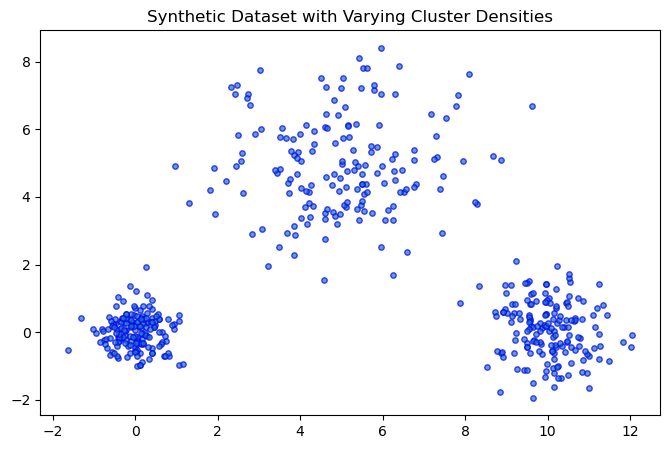

In [109]:
# Scatter plot to visualize data

plt.figure(figsize=(8,5))

plt.scatter(X[:,0], X[:,1], edgecolors='b',s=15, alpha=0.7)

plt.title('Synthetic Dataset with Varying Cluster Densities')

plt.show()

Step 2️⃣: Apply HDBSCAN with Default Parameters

In [110]:
# Default HDBSCAN clustering

clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)

labels_default = clusterer.fit_predict(X)

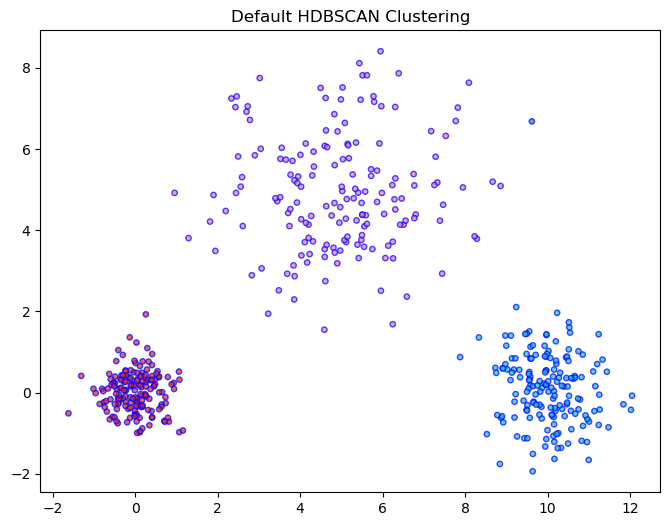

In [111]:
# Plot results

plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1],c=labels_default, cmap='tab10', edgecolors='b',s=15, alpha=0.7)

plt.title('Default HDBSCAN Clustering')

plt.show()

Step 3️⃣: Fine-Tuning min_cluster_size and min_samples

🔹 Smaller min_cluster_size → More small clusters.

🔹 Larger min_cluster_size → Fewer but more stable clusters.

🔹 Higher min_samples → More robust clustering with fewer outliers.

In [112]:
# Fine-tuned HDBSCAN clustering

clusterer_tuned = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=5)

labels_tuned = clusterer_tuned.fit_predict(X)

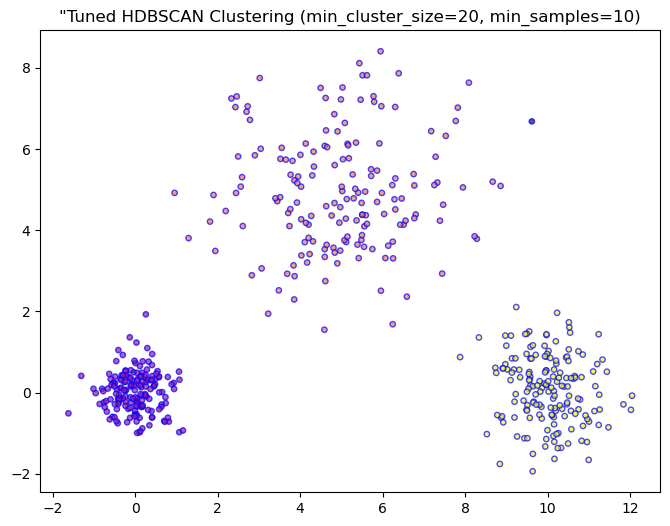

In [113]:
# Plot results

plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1],c=labels_tuned, cmap='plasma', edgecolors='b',s=15, alpha=0.7)

plt.title('"Tuned HDBSCAN Clustering (min_cluster_size=20, min_samples=10)')

plt.show()

Step 4️⃣: Evaluating Cluster Stability

One of HDBSCAN’s unique features is measuring cluster stability, which tells us how confident the algorithm is in assigning points to clusters.

Higher stability = More meaningful clusters.

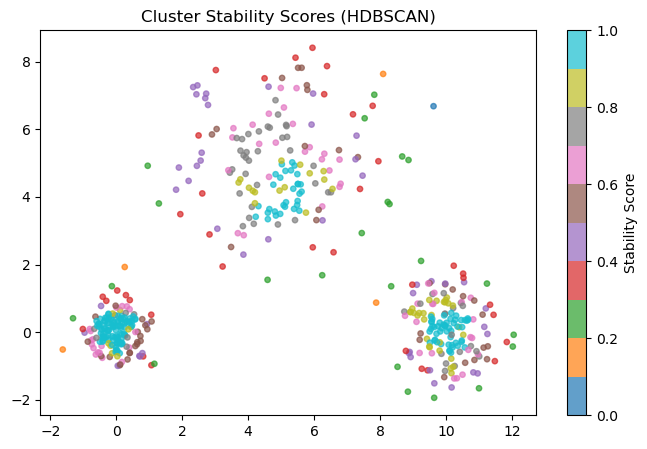

In [114]:
stability_score = clusterer_tuned.probabilities_

# Scatter plot with stability as color intensity

plt.figure(figsize=(8,5))

plt.scatter(X[:,0],X[:,1], c=stability_score, cmap='tab10', s=15, alpha=0.7)

plt.title('Cluster Stability Scores (HDBSCAN)')

plt.colorbar(label='Stability Score')

plt.show()

Key Observations & Takeaways
 
✅ Tuning min_cluster_size and min_samples significantly affects the number of clusters formed.
✅ Increasing min_cluster_size prevents too many small clusters and helps remove noise.
✅ Cluster stability scores help us evaluate the quality of clusters.
✅ Different datasets require different parameter tuning for best results.